# Phase-averaged and phase-resolved spectroscopy

## Loading data and observation, setting pathes

1. Import the necessary packages.

In [1]:
import pandas as pd
import sys
sys.path.append('../../')
from nustar_scripts.nu_class import np, plt, os, glob, NustarObservation, scan_phase_resolved_products
from nustar_scripts.pulsar_init import Nu_path, ObsList
from nustar_scripts.nu_pyxspec import Model, Xset, AllModels,  AllModels, xspec,fit_spectra, scan_containers_ph_res,  plot_ph_res_storage

import matplotlib
%matplotlib inline
pd.set_option('display.max_columns', 500)

2. Set `ObsID` and `NustarObservation` object.

In [2]:
ObsID = ObsList[3] 
nu_obs = NustarObservation(ObsID, nu_path=Nu_path)
ph_ave_folder = nu_obs.products_path+'/spe_and_lc'
ph_res_folder = nu_obs.products_path+'/phase_resolved'

###
Observation 90302319008 loaded successfully


3. Set xspec settings/models

In [3]:
model_name = 'relxilllp'  #set the model name
AllModels.lmod('relxill', '/Users/sdbykov/work/xray_pulsars/sj0243_nu/python_for_nustar/relxill_model/') #set path to relxill model
calc_errors = True #whether to calculate errors on spectral parameters.  useful to turn off when doing a quick fit.

AllModels.clear()
Xset.parallel.error = 22


## Phase-averaged spectra

1. Run cell below to set up an xspec model. Adjust its parameters to your needs and run `fit_spectra` function in the next cell.

The spectral results will be saved in the `xspec/{model name}/` folder in the `out{ObsID}/products/phase_resolved/` directory.

In [4]:
os.chdir(ph_ave_folder)

model = Model("constant*phabs*(bbodyrad+relxilllp)")
model.phabs.nH = '0.8 -1'

model.bbodyrad.kT = '1'
model.bbodyrad.norm = '1e3' # ,, 0.1, 0.2, 3, 4'

model.relxilllp.h = '5 -1'
model.relxilllp.a = '0 -1'
model.relxilllp.Incl = '15'
model.relxilllp.Incl.frozen = False
model.relxilllp.Rin = '70 0.1, 0, 0, 900, 900'
model.relxilllp.Rout = '=1.1*p8'
model.relxilllp.z = '0 -1'
model.relxilllp.gamma = '1.2  0.005 0.3 0.3 3 3'
model.relxilllp.logxi = '4'
model.relxilllp.Ecut = '20'
model.relxilllp.Ecut.frozen = False
model.relxilllp.refl_frac = '0.3'
model.relxilllp.fixReflFrac = '0'
model.relxilllp.Afe = '5 -1'



 *** loading RELXILL model (version 1.4.3) *** 


deleted xspec/relxilllp/*90302319008_relxilllp* and xspec/relxilllp/xcm/*90302319008_relxilllp* files
no storage found. fitting...
 loaded spe_and_lcA_sr.pi and spe_and_lcB_sr.pi from /Users/sdbykov/work/xray_pulsars/nustar_sj0243/nustar_products/out90302319008/products/spe_and_lc
fitting done
skipping errors for: []
    18     0.997438      0.99986    (-0.00120689,0.00121453)
     3      1.04164      1.09702    (-0.0298115,0.0255689)
     4      354.308      399.567    (-19.5687,25.6906)
     7      13.6269      18.5226    (-2.24613,2.64959)
     8      47.0324      55.3815    (-4.05701,4.29216)
    11     0.752824     0.794715    (-0.0204523,0.0214378)
Apparent non-monotonicity in statistic space detected.
Current bracket values 3.3921, 3.42364
and delta stat 0.481512, 2.75932
but latest trial 3.42313 gives 2.78662
Suggest that you check this result using the steppar command.
    12      3.29819      3.40787    (-0.0688435,0.0408361)
Apparent non-monotonicity in statistic space detec

,N,srcID,comp,par,ipar,val,error_l,error_u,er_status,sigma,frozen,link
0,0,90302319008_relxilllp_FPMA,constant,factor,1,1.000000,0.000000,0.000000,FFFFFFFFF,0.000000,True,
1,0,90302319008_relxilllp_FPMA,phabs,nH,2,0.800000,0.000000,0.000000,FFFFFFFFF,0.000000,True,
2,0,90302319008_relxilllp_FPMA,bbodyrad,kT,3,1.071455,1.041643,1.097023,FFFFFFFFF,0.015224,False,
3,0,90302319008_relxilllp_FPMA,bbodyrad,norm,4,373.876148,354.307691,399.567085,FFFFFFFFF,12.755803,False,
4,0,90302319008_relxilllp_FPMA,relxilllp,h,5,5.000000,0.000000,0.000000,FFFFFFFFF,0.000000,True,
5,0,90302319008_relxilllp_FPMA,relxilllp,a,6,0.000000,0.000000,0.000000,FFFFFFFFF,0.000000,True,
6,0,90302319008_relxilllp_FPMA,relxilllp,Incl,7,15.873052,13.626925,18.522640,FFFFFFFFF,2.119650,False,
7,0,90302319008_relxilllp_FPMA,relxilllp,Rin,8,51.089384,47.032377,55.381542,FFFFFFFFF,2.822894,False,
8,0,90302319008_relxilllp_FPMA,relxilllp,Rout,9,56.198322,0.000000,0.000000,FFFFFTFFF,0.000000,False,= 1.1*p8
9,0,90302319008_relxilllp_FPMA,relxilllp,z,10,0.000000,0.000000,0.000000,FFFFFFFFF,0.000000,True,


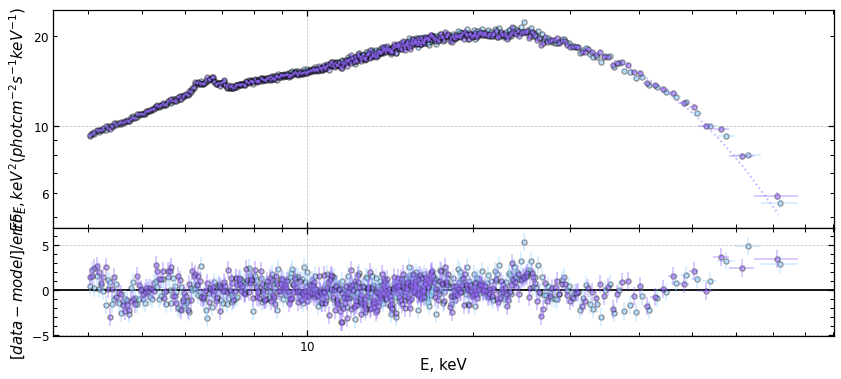

In [5]:

mo_fid_pars = fit_spectra(model = model, model_name = model_name, prefix = ObsID, dataset='spe_and_lc', rewrite = True, calc_errors = calc_errors)
mo_fid_pars

## Phase-resolved spectra

1.  Set the model for the phase-resolved spectra in bins.  Usially it is the same model as for phase-averaged spectra, but with some parameters frozen.

In [6]:
os.chdir(ph_res_folder)

In [7]:
#try to restore the model for phase-average spectra
xspec.Xset.restore(f'{ph_ave_folder}/xspec/{model_name}/xcm/{ObsID}_{model_name}.xcm_model')

#free some of its parameters to phase-averaged values
model = AllModels(1)
model.bbodyrad.kT.frozen = True
model.bbodyrad.norm.frozen = True
model.relxilllp.logxi.frozen = True
model.relxilllp.Rin.frozen = True
model.relxilllp.Incl.frozen = True


2. Run the cell to iterate over phase bins and fit the spectra.

##################### bin number 1 #####################
deleted xspec/relxilllp/*90302319008_bin1_relxilllp* and xspec/relxilllp/xcm/*90302319008_bin1_relxilllp* files
no storage found. fitting...
 loaded phase_resolved_bin1A_sr.pi and phase_resolved_bin1B_sr.pi from /Users/sdbykov/work/xray_pulsars/nustar_sj0243/nustar_products/out90302319008/products/phase_resolved
fitting done
skipping errors for: []
    18     0.992244      1.00039    (-0.00406698,0.00408295)
    11     0.510661     0.562916    (-0.0263894,0.0258662)
    14       13.459      14.0492    (-0.29117,0.299019)
    15     0.148039     0.166182    (-0.00901197,0.0091308)
    17     0.104292     0.107625    (-0.00165782,0.00167537)
Fit done;  chi2 = 1760.3707691022496 for 1600 dof, chi2_red = 1.100231730688906, H0 prob = 0.002915536763
<Storage with 2 containers>
##################### bin number 2 #####################
deleted xspec/relxilllp/*90302319008_bin2_relxilllp* and xspec/relxilllp/xcm/*90302319008_bin2_relxilllp

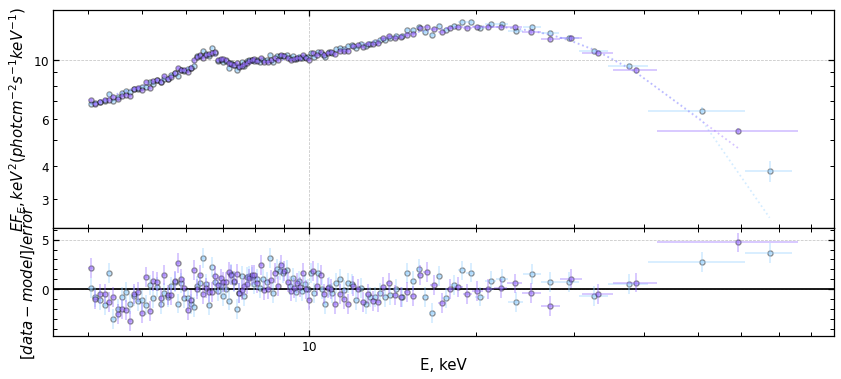

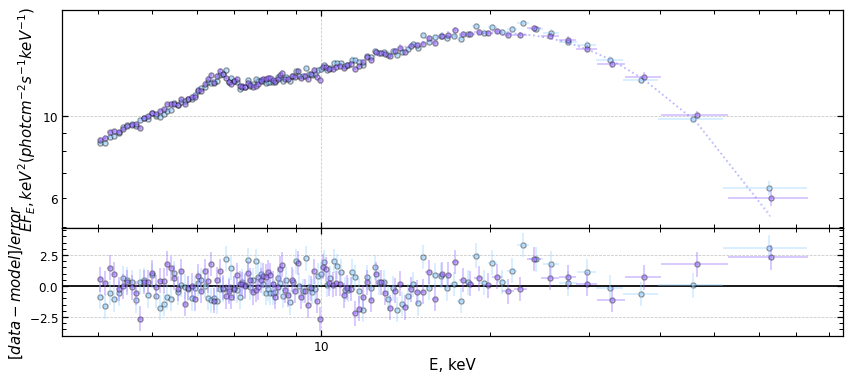

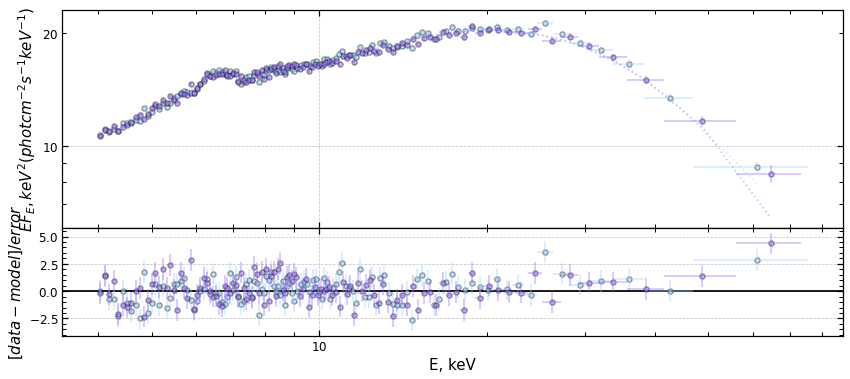

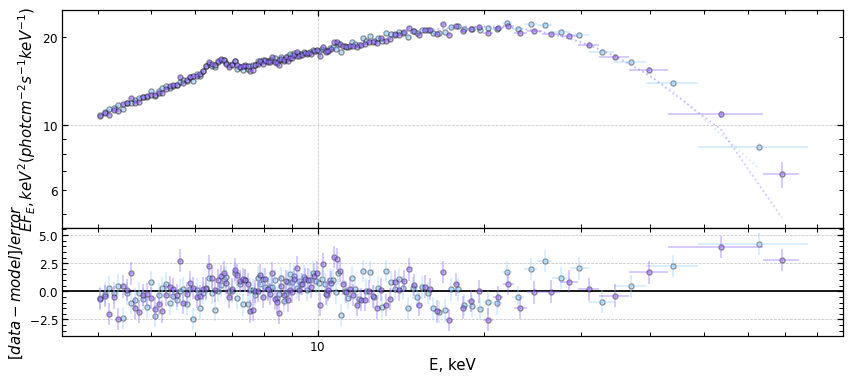

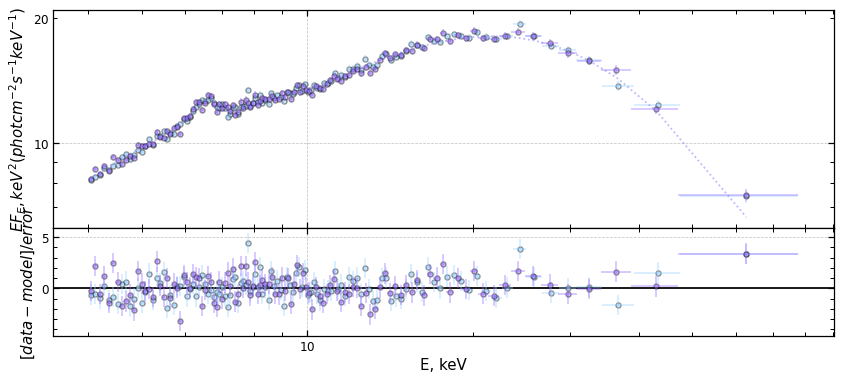

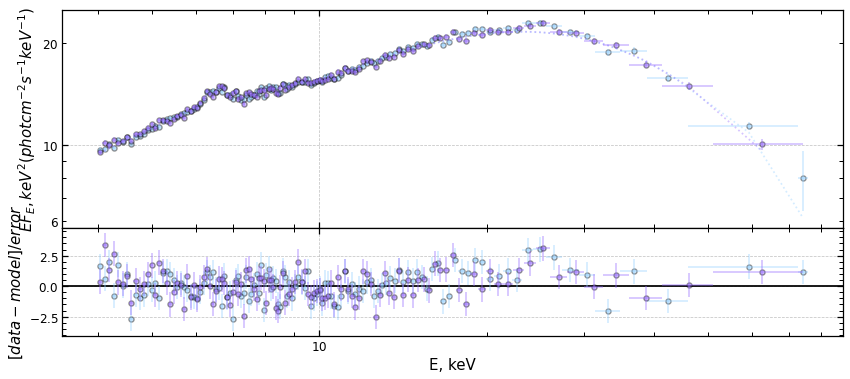

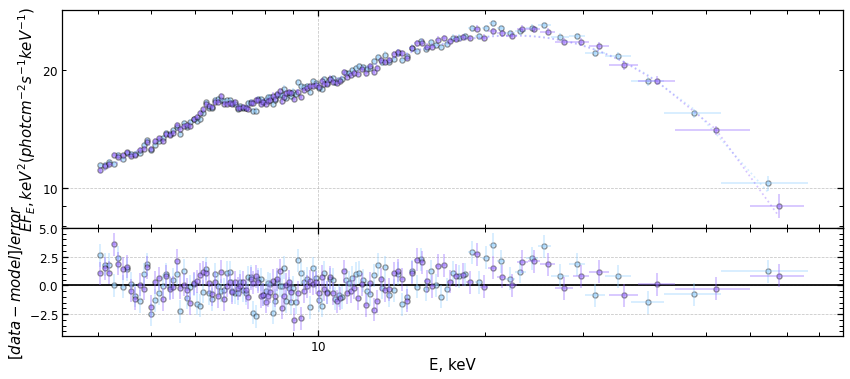

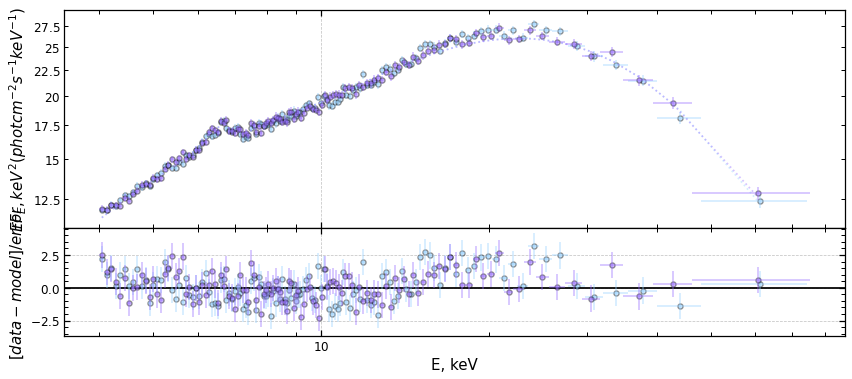

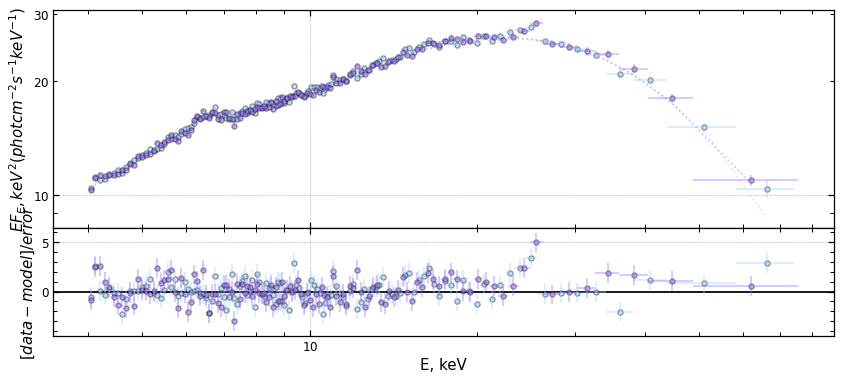

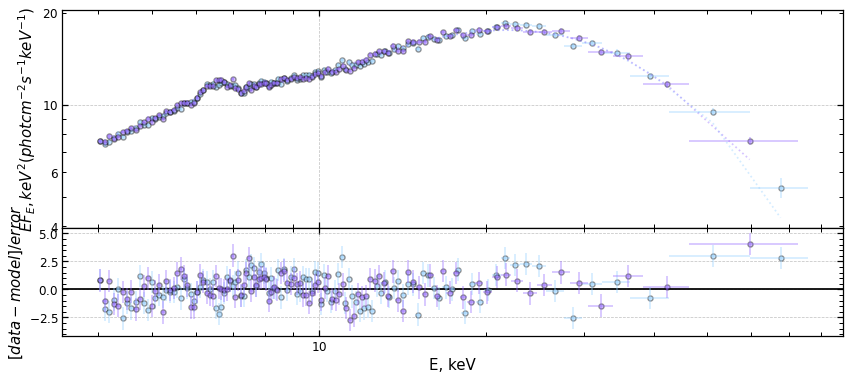

In [8]:
for binnum in range(1,11):
    print(f'##################### bin number {binnum} #####################')
    binnum = str(binnum)
    bb_pars = fit_spectra(model = model, model_name = model_name, prefix = f'{ObsID}_bin{binnum}', dataset=f'phase_resolved_bin{binnum}', rewrite = True, calc_errors=calc_errors)


## Plot  phase-resolved results

1. Run the following cells to plot the results.

In [9]:
df_ph_res = scan_containers_ph_res(model_name)
df_ph_res

error_l  error_u  frozen       val
comp      par phase                                    
bbodyrad  kT  0.05       0.0      0.0     1.0  1.074265
              0.15       0.0      0.0     1.0  1.074265
              0.25       0.0      0.0     1.0  1.074265
              0.35       0.0      0.0     1.0  1.074265
              0.45       0.0      0.0     1.0  1.074265
...                      ...      ...     ...       ...
relxilllp z   0.55       0.0      0.0     1.0  0.000000
              0.65       0.0      0.0     1.0  0.000000
              0.75       0.0      0.0     1.0  0.000000
              0.85       0.0      0.0     1.0  0.000000
              0.95       0.0      0.0     1.0  0.000000

[150 rows x 4 columns]

In [10]:
df_ph_res.loc[pd.IndexSlice['relxilllp','refl_frac',:]]

,error_l,error_u,frozen,val
phase,,,,
0.05,0.146202,0.164161,0.0,0.155126
0.15,0.100951,0.116556,0.0,0.108697
0.25,0.080268,0.094336,0.0,0.087253
0.35,0.067889,0.081618,0.0,0.074709
0.45,0.095989,0.110988,0.0,0.103441
0.55,0.084987,0.098100,0.0,0.091514
0.65,0.068510,0.081259,0.0,0.074855
0.75,0.061957,0.074286,0.0,0.068094
0.85,0.064355,0.077037,0.0,0.070657


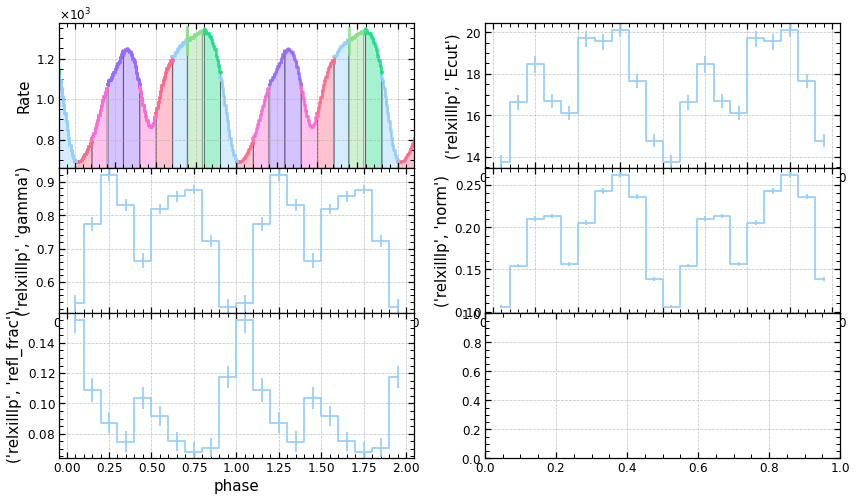

In [11]:
os.chdir(ph_res_folder)
plot_ph_res_storage(df_ph_res, nu_obs, 'phase_resolved');


With `df_ph_res` data frame and functions used above  you can visualize the results and creates plots and tables.